In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit

In [5]:
from tqdm.notebook import tqdm_notebook
from sklearn import metrics

In [16]:
data = pd.read_csv('all_province_train_2.csv')
data.head()

y_train = data.pop('PM2.5')
X_train = data

In [46]:
data = pd.read_csv('./Chiangmai/train/chiangmai_train_format_2.csv')

#data = data[['year','month','day','hour','temp','wind speed','wind dir','PM2.5']]
data.head()
y_train = data.pop('PM2.5')
X_train = data

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27584 entries, 0 to 27583
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        27584 non-null  int64  
 1   month       27584 non-null  int64  
 2   day         27584 non-null  int64  
 3   hour        27584 non-null  int64  
 4   temp        27584 non-null  float64
 5   wind speed  27584 non-null  float64
 6   wind dir    27584 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 1.5 MB


In [48]:
tscv = TimeSeriesSplit(n_splits=3)
i = 1
score = []
for tr_index, val_index in tqdm_notebook(tscv.split(X_train)):
    X_tr, X_val = X_train.iloc[tr_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[tr_index], y_train.iloc[val_index]
    for mf in tqdm_notebook(np.linspace(1, 7, 7)):
        for ne in np.linspace(50, 100, 6):
            for md in np.linspace(20, 40, 5):
                for msl in np.linspace(30, 100, 8):
                    rfr = RandomForestRegressor(
                        max_features=int(mf),
                        n_estimators=int(ne),
                        max_depth=int(md),
                        min_samples_leaf=int(msl),
                        n_jobs = -1)
                    rfr.fit(X_tr, y_tr)
                    y_pred = rfr.predict(X_val)
                    score.append([i,
                                  mf, 
                                  ne,
                                  md, 
                                  msl, 
                                  rfr.score(X_val, y_val),
                                  np.sqrt(metrics.mean_squared_error(y_val, y_pred))])
    i += 1

0it [00:00, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [49]:
print(score)

[[1, 1.0, 50.0, 20.0, 30.0, -0.7994431538352045, 19.944989390058982], [1, 1.0, 50.0, 20.0, 40.0, -1.548334420286419, 23.735203195913005], [1, 1.0, 50.0, 20.0, 50.0, -0.834245914636107, 20.13694222989472], [1, 1.0, 50.0, 20.0, 60.0, -0.8326805689661325, 20.128347961533372], [1, 1.0, 50.0, 20.0, 70.0, -0.849469842673902, 20.220336140506245], [1, 1.0, 50.0, 20.0, 80.0, -1.0148169275873888, 21.1048631001294], [1, 1.0, 50.0, 20.0, 90.0, -0.8584439181217036, 20.26933375858403], [1, 1.0, 50.0, 20.0, 100.0, -0.9621548663007531, 20.827223849003765], [1, 1.0, 50.0, 25.0, 30.0, -1.2433763435760783, 22.269774110647514], [1, 1.0, 50.0, 25.0, 40.0, -0.8730813672039852, 20.34899971683322], [1, 1.0, 50.0, 25.0, 50.0, -0.946649067911532, 20.744767748986277], [1, 1.0, 50.0, 25.0, 60.0, -0.990533341689102, 20.977294347426295], [1, 1.0, 50.0, 25.0, 70.0, -1.4040165378698752, 23.053319505984913], [1, 1.0, 50.0, 25.0, 80.0, -1.0698561858937126, 21.391184311479158], [1, 1.0, 50.0, 25.0, 90.0, -0.626635979131

In [50]:
import pickle

with open('rf_chiangmai_score.pickle', 'wb') as fp:
    pickle.dump(score, fp)

In [26]:
with open ('rf_hotspot_score.pickle', 'rb') as fp:
    score1 = pickle.load(fp)

In [28]:
import matplotlib.pyplot as plt

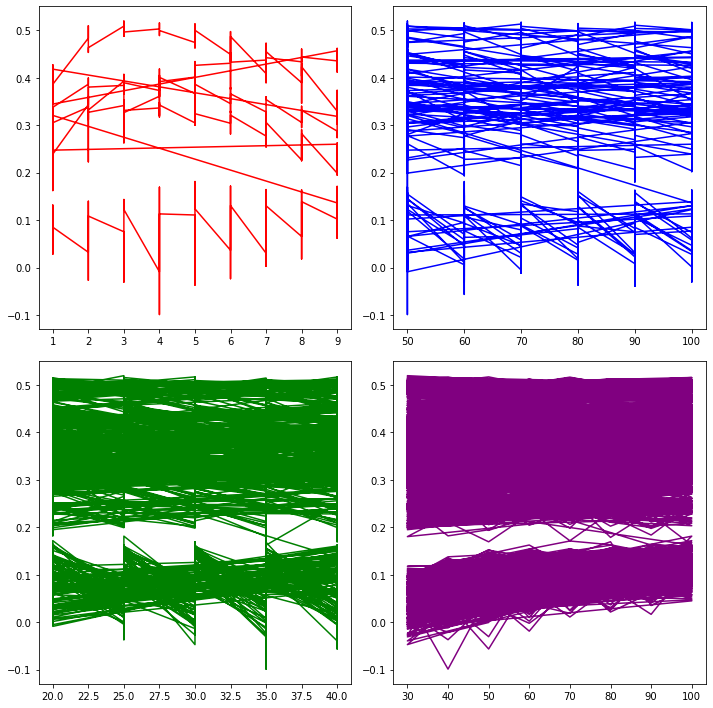

In [30]:
#define subplots
fig, ax = plt.subplots(2, 2, figsize=(10,10))
fig.tight_layout()

#create subplots
ax[0, 0].plot([i[1] for i in score],[i[-1] for i in score], color='red')
ax[0, 1].plot([i[2] for i in score],[i[-1] for i in score], color='blue')
ax[1, 0].plot([i[3] for i in score],[i[-1] for i in score], color='green')
ax[1, 1].plot([i[4] for i in score],[i[-1] for i in score], color='purple')
# plt.plot([i[1] for i in score],[i[-1] for i in score])

In [51]:
score2 = np.array(score)

In [52]:
np.argmax(score2, axis=0)

array([3360, 1440,  200,   32,    7, 3646, 1751])

In [58]:
np.argmin(score2, axis=0)

array([   0,    0,    0,    0,    0,  534, 1479])

In [54]:
score[3646]

[3, 2.0, 60.0, 20.0, 90.0, 0.42859584157524633, 28.31285759928573]

In [56]:
score[1479]

[1, 7.0, 50.0, 40.0, 100.0, 0.16881694805826097, 13.555423285611994]

In [43]:
tscv = TimeSeriesSplit(n_splits=3)
i = 1
score4 = []
for tr_index, val_index in tscv.split(X_train):
    X_tr, X_val = X_train.iloc[tr_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[tr_index], y_train.iloc[val_index]
    
    for md in tqdm_notebook(np.linspace(10, 100, 10)):
        rfr = RandomForestRegressor(max_features = 3,n_estimators=200,max_depth=int(md),n_jobs = -1)
        rfr.fit(X_tr, y_tr)
        score4.append([i,md,rfr.score(X_val, y_val)])
    i += 1

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

In [41]:
score3

[[1, 50.0, 0.2156177115654574],
 [1, 102.77777777777777, 0.23787300326505179],
 [1, 155.55555555555554, 0.17275555007965593],
 [1, 208.33333333333334, 0.21914720076797722],
 [1, 261.1111111111111, 0.21825033542348304],
 [1, 313.8888888888889, 0.2073907727869334],
 [1, 366.6666666666667, 0.22331768877345404],
 [1, 419.44444444444446, 0.20261324456334928],
 [1, 472.22222222222223, 0.2184823889208537],
 [1, 525.0, 0.2046389466580868],
 [1, 577.7777777777778, 0.22882763565616593],
 [1, 630.5555555555555, 0.23657222799694588],
 [1, 683.3333333333334, 0.20865108085465411],
 [1, 736.1111111111111, 0.2202500029487594],
 [1, 788.8888888888889, 0.22246840576669846],
 [1, 841.6666666666666, 0.22049755455610764],
 [1, 894.4444444444445, 0.22517186158502467],
 [1, 947.2222222222223, 0.2258458350855599],
 [1, 1000.0, 0.22494511519842753],
 [2, 50.0, 0.3722922025757093],
 [2, 102.77777777777777, 0.23859482805518462],
 [2, 155.55555555555554, 0.2914801330088591],
 [2, 208.33333333333334, 0.29650828667

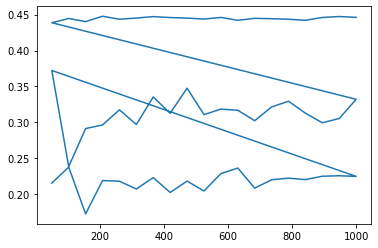

In [42]:
plt.plot([i[1] for i in score3],[i[-1] for i in score3])

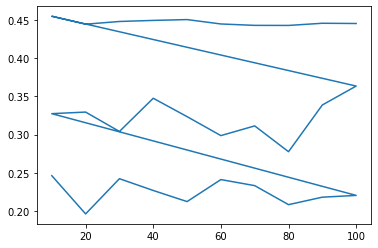

In [44]:
plt.plot([i[1] for i in score4],[i[-1] for i in score4])

In [47]:
from sklearn import metrics
tscv = TimeSeriesSplit(n_splits=3)
i = 1
score5 = []
for tr_index, val_index in tscv.split(X_train):
    X_tr, X_val = X_train.iloc[tr_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[tr_index], y_train.iloc[val_index]
    
   
    rfr = RandomForestRegressor(max_features=3,
                        n_estimators=30,
                        max_depth=25,
                        min_samples_leaf=30,
                        n_jobs = -1,random_state=0)
    rfr.fit(X_tr, y_tr)
    y_pred = rfr.predict(X_val)
    score5.append([i,rfr.score(X_val, y_val),np.sqrt(metrics.mean_squared_error(y_val, y_pred))])
    i += 1

In [48]:
score5

[[1, 0.1583972674079417, 14.738471722636197],
 [2, 0.29981120081392354, 19.732412549778267],
 [3, 0.4571292782786298, 17.39744835129198]]